# Convolution LSTM [ConvoLSTM]


### ConvLSTM offers significant advantages over traditional LSTM models for tasks involving spatiotemporal data. In the context of wind forecasting, it allows for more detailed and accurate modeling of wind patterns, which can significantly enhance the efficiency and reliability of wind energy production. This capability to handle both spatial and temporal data effectively makes it a preferred choice for advanced forecasting models in renewable energy and meteorological applications.
### ConvLSTM offers a powerful tool that leverages the strengths of both CNNs and LSTMs.









#### We'll start by importing files and datasets, examining these datasets to understand their structure and then proceed to apply the ConvLSTM model.

#### Next, we will calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and the R² score for the model predictions. Additionally, we'll also make predictions for the next day's wind energy based on the available data.

In [2]:
# Re-import the pandas library and load the datasets again
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
import joblib


gujarat_data = pd.read_csv(r'C:\Users\tsank\Downloads\guj-wind-dataset.csv')
karnataka_data = pd.read_csv(r'C:\Users\tsank\Downloads\krntk-wind-dataset.csv')

# Display the first few rows of each dataset and their structure
karnataka_data.head(), gujarat_data.head()


(   YEAR  MO  DY     PS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE   WD10M  \
 0  2021   1   1  97.00   2.68       3.73       1.34         2.39   74.94   
 1  2021   1   2  97.00   2.45       4.10       0.97         3.14   69.06   
 2  2021   1   3  96.88   1.86       3.16       0.27         2.88  161.50   
 3  2021   1   4  96.88   0.97       1.80       0.35         1.45  154.94   
 4  2021   1   5  96.95   1.67       3.12       0.52         2.60   89.25   
 
    WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE   WD50M   RH2M    T2M  
 0   4.06       5.00       2.30         2.70   75.56  75.12  23.19  
 1   3.74       5.38       1.66         3.72   73.50  74.00  23.08  
 2   2.72       4.23       0.45         3.79  159.44  76.44  25.21  
 3   1.48       2.66       0.30         2.36  145.69  77.56  25.33  
 4   2.55       4.08       0.65         3.43   93.94  82.69  23.84  ,
    YEAR  MO  DY      PS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE   WD10M  \
 0  2021   1   1  100.96   3.70       4.48 

#### Both datasets include several meteorological variables by year, month, and day, such as pressure (PS), wind speed at 10 meters (WS10M) and 50 meters (WS50M), and their respective maximum, minimum, and range values, among other parameters.
#### Procedure-

* model both the dataset for gujarat and karnataka separately.
* Prepare the data for time series forecasting, including normalization and shaping into sequences suitable for LSTM-based networks.
* Define and train the ConvLSTM model.
* Evaluate the model using MAE, MSE, and R² metrics.
* Predict the wind energy for the next 1-2 months.

In [12]:
# Combine the features from both states
features_karnataka = karnataka_data[['WS10M', 'WS50M']]
features_gujarat = gujarat_data[['WS10M', 'WS50M']]

# Normalize the features
scaler_karnataka = MinMaxScaler()
features_scaled_karnataka = scaler_karnataka.fit_transform(features_karnataka)

scaler_gujarat = MinMaxScaler()
features_scaled_gujarat = scaler_gujarat.fit_transform(features_gujarat)

## Function to create sequences and reshape for ConvLSTM
def create_and_reshape_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i+n_steps)])
        y.append(data[i+n_steps])
    X = np.array(X)
    X = X.reshape((X.shape[0], 1, X.shape[1], X.shape[2], 1))  # Reshape for ConvLSTM
    return X, np.array(y)

# Create and reshape sequences for Karnataka
X_karnataka, y_karnataka = create_and_reshape_sequences(features_scaled_karnataka, n_steps)
X_train_karnataka, X_test_karnataka, y_train_karnataka, y_test_karnataka = train_test_split(
    X_karnataka, y_karnataka, test_size=0.2, random_state=42)

# Create and reshape sequences for Gujarat
X_gujarat, y_gujarat = create_and_reshape_sequences(features_scaled_gujarat, n_steps)
X_train_gujarat, X_test_gujarat, y_train_gujarat, y_test_gujarat = train_test_split(
    X_gujarat, y_gujarat, test_size=0.2, random_state=42)


In [13]:
pip install tensorflow

In [14]:


# # Reshape the data to fit the model (add a channel dimension)
# X_train_combined_reshaped = X_train_combined.reshape((X_train_combined.shape[0], 1, X_train_combined.shape[1], X_train_combined.shape[2], 1))
# X_test_combined_reshaped = X_test_combined.reshape((X_test_combined.shape[0], 1, X_test_combined.shape[1], X_test_combined.shape[2], 1))

# # Define the ConvLSTM model structure again
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense 
import numpy as np  # Ensure NumPy is imported

# from tensorflow.keras.layers import Dropout

# model = Sequential([
#     ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(1, n_steps, 2, 1), return_sequences=True),
#     Dropout(0.2),  # Adding dropout for regularization
#     Flatten(),
#     Dense(50, activation='relu'),
#     Dropout(0.2),  # Adding dropout for regularization
#     Dense(2)  # Predicts WS10M and WS50M
# ])
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Fit the model on the reshaped combined dataset
# history = model.fit(X_train_combined_reshaped, y_train_combined, epochs=10, validation_data=(X_test_combined_reshaped, y_test_combined))

model_karnataka = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', 
               input_shape=(1, n_steps, 2, 1), return_sequences=True),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(2)  # Outputs for WS10M and WS50M
])
model_karnataka.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define the ConvLSTM model for Gujarat
model_gujarat = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', 
               input_shape=(1, n_steps, 2, 1), return_sequences=True),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(2)
])
model_gujarat.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model for Karnataka
model_karnataka.fit(X_train_karnataka, y_train_karnataka, epochs=10, validation_data=(X_test_karnataka, y_test_karnataka))

# Train the model for Gujarat
model_gujarat.fit(X_train_gujarat, y_train_gujarat, epochs=10, validation_data=(X_test_gujarat, y_test_gujarat))


Epoch 1/10


28/28 [==============================] - 3s 33ms/step - loss: 0.0416 - mae: 0.1549 - val_loss: 0.0162 - val_mae: 0.1093
Epoch 2/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0141 - mae: 0.0897 - val_loss: 0.0119 - val_mae: 0.0875
Epoch 3/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0116 - mae: 0.0802 - val_loss: 0.0105 - val_mae: 0.0774
Epoch 4/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0102 - mae: 0.0746 - val_loss: 0.0094 - val_mae: 0.0734
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0092 - mae: 0.0711 - val_loss: 0.0087 - val_mae: 0.0707
Epoch 6/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0661 - val_loss: 0.0081 - val_mae: 0.0682
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0074 - mae: 0.0633 - val_loss: 0.0078 - val_mae: 0.0663
Epoch 8/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0069 - mae: 0

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model for Karnataka
predictions_karnataka = model_karnataka.predict(X_test_karnataka)
mae_karnataka = mean_absolute_error(y_test_karnataka, predictions_karnataka)
mse_karnataka = mean_squared_error(y_test_karnataka, predictions_karnataka)
r2_karnataka = r2_score(y_test_karnataka, predictions_karnataka)

# Evaluate the model for Gujarat
predictions_gujarat = model_gujarat.predict(X_test_gujarat)
mae_gujarat = mean_absolute_error(y_test_gujarat, predictions_gujarat)
mse_gujarat = mean_squared_error(y_test_gujarat, predictions_gujarat)
r2_gujarat = r2_score(y_test_gujarat, predictions_gujarat)

# Print evaluation results
print("Karnataka - MAE: {:.3f}, MSE: {:.3f}, R2 Score: {:.3f}".format(mae_karnataka, mse_karnataka, r2_karnataka))
print("Gujarat - MAE: {:.3f}, MSE: {:.3f}, R2 Score: {:.3f}".format(mae_gujarat, mse_gujarat, r2_gujarat))

7/7 [==============================] - 0s 2ms/step
Karnataka - MAE: 0.064, MSE: 0.007, R2 Score: 0.677
Gujarat - MAE: 0.065, MSE: 0.007, R2 Score: 0.632


1/1 [==============================] - 0s 24ms/step
                            Predicted WS10M  Predicted WS50M
Date                                                        
2024-05-04 07:23:35.750573         1.599782         2.329562
2024-05-05 07:23:35.750573         1.651271         2.390884
2024-05-06 07:23:35.750573         1.684647         2.442277
2024-05-07 07:23:35.750573         1.689371         2.441649
2024-05-08 07:23:35.750573         1.701799         2.465132
2024-05-09 07:23:35.750573         1.697101         2.451951
2024-05-10 07:23:35.750573         1.705283         2.469775
2024-05-11 07:23:35.750573         1.698672         2.454044
2024-05-12 07:23:35.750573         1.705991         2.470718
2024-05-13 07:23:35.750573         1.698992         2.454470


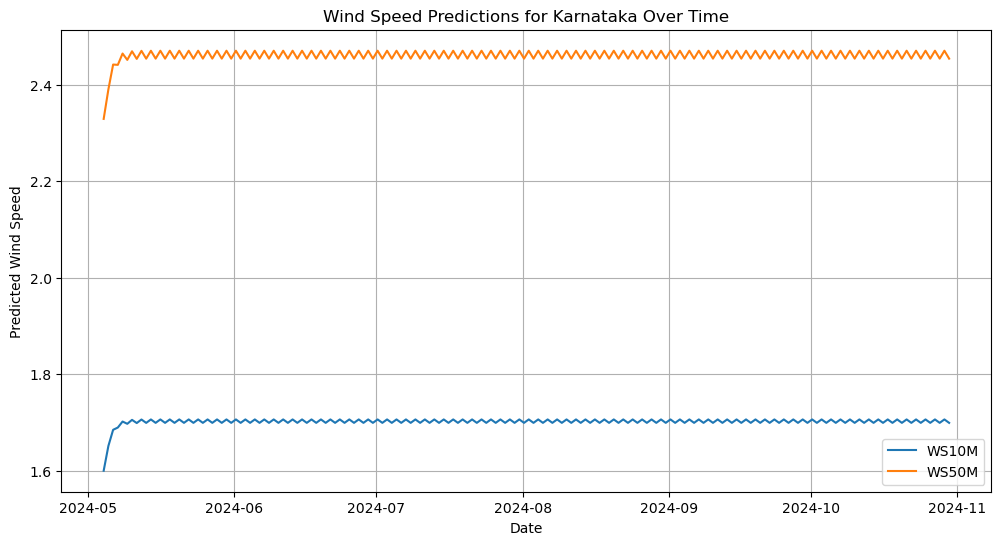

In [31]:
# # Assuming the date column name i confirmed and corrected
# karnataka_data['DY'] = pd.to_datetime(karnataka_data['DY']) 
# # gujarat_data['DY'] = pd.to_datetime(guajarat_data['DY'])# Convert to datetime if it's not already
# last_date = karnataka_data['DY'].iloc[-1] 

# gujarat_data['DY'] = pd.to_datetime(gujarat_data['DY'])# Get the last date from your dataset
# last_date = gujarat_data['DY'].iloc[-1]

# num_predictions = 180  # Approximate number of days in 6 months
# predictions = []
# dates = [last_date + timedelta(days=i) for i in range(1, num_predictions + 1)]

# current_sequence = last_sequence_reshaped.copy()  # Assuming this variable is already prepared


# import numpy as np
# from datetime import timedelta

# for _ in range(num_predictions):
#     # Predict the next step
#     next_step_prediction = model.predict(current_sequence)
    
#     # Inverse transform the prediction to original scale if necessary
#     next_step_prediction = scaler.inverse_transform(next_step_prediction.reshape(-1, 2))[0]

#     # Store the prediction
#     predictions.append(next_step_prediction)
    
#     # Update the sequence for the next prediction
#     next_sequence = np.roll(current_sequence, -1, axis=2)
#     next_sequence[0, 0, -1, :] = next_step_prediction
#     current_sequence = next_sequence.reshape(1, 1, next_sequence.shape[2], next_sequence.shape[3], 1)

# # Creating a DataFrame for the predictions
# df_predictions = pd.DataFrame(predictions, columns=['Predicted WS10M', 'Predicted WS50M'])
# df_predictions['DY'] = dates

# # Display the DataFrame
# print(df_predictions.head())  # Print first few rows to check 
X_train_karnataka_reshaped = X_train_karnataka.reshape((X_train_karnataka.shape[0], 1, n_steps, 2, 1))
X_test_karnataka_reshaped = X_test_karnataka.reshape((X_test_karnataka.shape[0], 1, n_steps, 2, 1))



import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# # Load the trained model and scaler for Karnataka
# model_karnataka = load_model('model_karnataka.h5')
# scaler_karnataka = MinMaxScaler()  # Suppose the scaler was saved and loaded similarly

# Prepare the last sequence from the test set (assumed to be loaded and prepared as X_test_karnataka_reshaped)
last_sequence_karnataka = X_test_karnataka_reshaped[-1]

# Prepare to collect predictions for Karnataka
future_predictions_karnataka = []
forecast_days = 180

# Loop through the number of days you want to predict for Karnataka
for day in range(forecast_days):
    next_step_prediction_karnataka = model_karnataka.predict(last_sequence_karnataka[np.newaxis, :, :, :, :])
    next_step_prediction_transformed_karnataka = scaler_karnataka.inverse_transform(next_step_prediction_karnataka.reshape(-1, 2))[0]
    future_predictions_karnataka.append(next_step_prediction_transformed_karnataka)
    last_sequence_karnataka = np.roll(last_sequence_karnataka, -1, axis=2)
    last_sequence_karnataka[0, -1, :] = next_step_prediction_karnataka.reshape(2, 1)

# Generate future dates starting from tomorrow for Karnataka
dates_karnataka = [datetime.now() + timedelta(days=i) for i in range(180)]

# Create and display DataFrame for Karnataka
df_predictions_karnataka = pd.DataFrame(future_predictions_karnataka, columns=['Predicted WS10M', 'Predicted WS50M'], index=dates_karnataka)
df_predictions_karnataka.index.name = 'Date' 


print(df_predictions_karnataka.head(10))

# Plot the predictions for Karnataka
plt.figure(figsize=(12, 6))
plt.plot(df_predictions_karnataka.index, df_predictions_karnataka['Predicted WS10M'], label='WS10M')
plt.plot(df_predictions_karnataka.index, df_predictions_karnataka['Predicted WS50M'], label='WS50M')
plt.title('Wind Speed Predictions for Karnataka Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Wind Speed')
plt.legend()
plt.grid(True)
plt.show()



1/1 [==============================] - 0s 30ms/step
                            Predicted WS10M  Predicted WS50M
Date                                                        
2024-05-04 07:32:30.704342         2.871572         4.259903
2024-05-05 07:32:30.704342         3.114280         4.561348
2024-05-06 07:32:30.704342         3.147559         4.666898
2024-05-07 07:32:30.704342         3.210458         4.703984
2024-05-08 07:32:30.704342         3.181286         4.716929
2024-05-09 07:32:30.704342         3.222293         4.721541
2024-05-10 07:32:30.704342         3.185442         4.723094
2024-05-11 07:32:30.704342         3.223752         4.723705
2024-05-12 07:32:30.704342         3.185955         4.723855
2024-05-13 07:32:30.704342         3.223932         4.723972


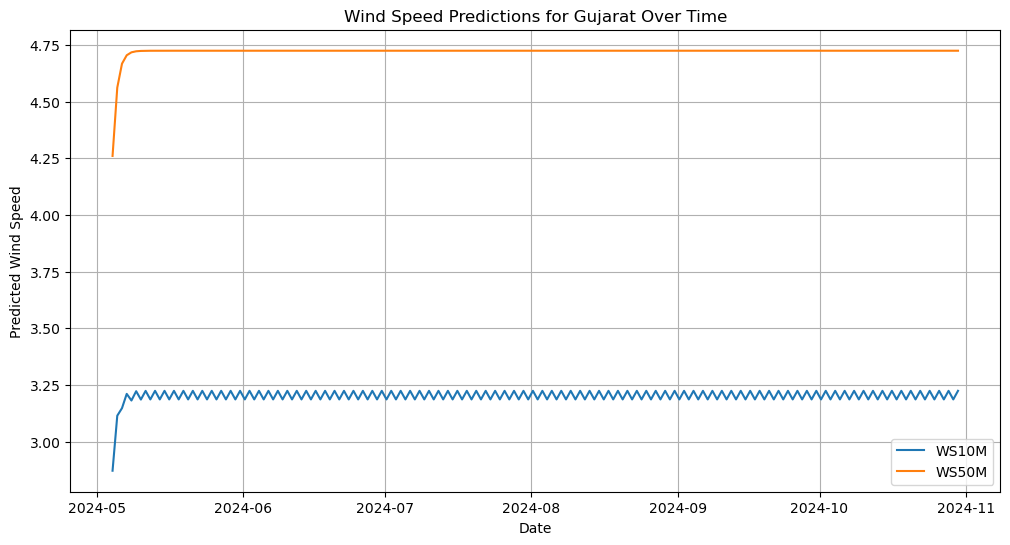

In [34]:
# # Load the trained model and scaler for Gujarat
# model_gujarat = load_model('model_gujarat.h5')
# scaler_gujarat = MinMaxScaler()  # Suppose the scaler was saved and loaded similarly
X_train_gujarat_reshaped = X_train_gujarat.reshape((X_train_gujarat.shape[0], 1, n_steps, 2, 1))
X_test_gujarat_reshaped = X_test_gujarat.reshape((X_test_gujarat.shape[0], 1, n_steps, 2, 1))
# Prepare the last sequence from the test set (assumed to be loaded and prepared as X_test_gujarat_reshaped)
last_sequence_gujarat = X_test_gujarat_reshaped[-1]

# Prepare to collect predictions for Gujarat
future_predictions_gujarat = []

# Loop through the number of days you want to predict for Gujarat
for day in range(forecast_days):
    next_step_prediction_gujarat = model_gujarat.predict(last_sequence_gujarat[np.newaxis, :, :, :, :])
    next_step_prediction_transformed_gujarat = scaler_gujarat.inverse_transform(next_step_prediction_gujarat.reshape(-1, 2))[0]
    future_predictions_gujarat.append(next_step_prediction_transformed_gujarat)
    last_sequence_gujarat = np.roll(last_sequence_gujarat, -1, axis=2)
    last_sequence_gujarat[0, -1, :] = next_step_prediction_gujarat.reshape(2, 1)

# Generate future dates starting from tomorrow for Gujarat
dates_gujarat = [datetime.now() + timedelta(days=i) for i in range(180)]

# Create and display DataFrame for Gujarat
df_predictions_gujarat = pd.DataFrame(future_predictions_gujarat, columns=['Predicted WS10M', 'Predicted WS50M'], index=dates_gujarat)
df_predictions_gujarat.index.name = 'Date'

print(df_predictions_gujarat.head(10))
# Plot the predictions for Gujarat
plt.figure(figsize=(12, 6))
plt.plot(df_predictions_gujarat.index, df_predictions_gujarat['Predicted WS10M'], label='WS10M')
plt.plot(df_predictions_gujarat.index, df_predictions_gujarat['Predicted WS50M'], label='WS50M')
plt.title('Wind Speed Predictions for Gujarat Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Wind Speed')
plt.legend()
plt.grid(True)
plt.show()
